# Projeto 02
Projeto Final - Aprendizado de Máquina  
## Autor: Marcos Angelo Cemim  
  
  
## Considere as seguintes informações:
Bases de dados:   
    [Travel Insurance Prediction Data](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data)   
    [Student Stress Factors: A Comprehensive Analysis](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis)  
Utilizar os classificadores: Decision Tree, KNN e K-Means.

## As notas de projeto serão classificadas de acordo com as seguintes etapas:  
### 1) Pré-processamento dos dados(transformação de dados categóricos e normalização);
### 2) Apresentação dos resultados de acurácia e matriz confusão;

### 3) Travel Insurance Prediction
    - Considerar uma versão da base de dados sem o atributo classe TravelInsurance;
    - Faça o agrupamento dos dados baseado no algoritmo K-Means. Para isso, utilize as colunas AnnualIncome e FrequentFlyer. 
    - Realizar a plotagem da distribuição dos dados por cluster;
### 4)  Student Stress Factors: A Comprehensive Analysis
    - Considerar uma versão da base de dados sem o atributo classe stress_level; 
    - Faça o agrupamento dos dados baseado no algoritmo K-Means. Para isso, utilize as colunas anxiety_level e sleep_quality. 
    - Realizar a plotagem da distribuição dos dados por cluster;

## 1) Pré-processamento dos dados(transformação de dados categóricos e normalização)

### Importação dos dados

In [1]:
import opendatasets as od
import os
import shutil

owner_user_insurance = 'tejashvi14'
project_name_insurance = 'travel-insurance-prediction-data'
owner_user_stress = 'rxnach'
project_name_stress = 'student-stress-factors-a-comprehensive-analysis'

if not os.path.isdir(f'../{project_name_insurance}/'):
    od.download(f'https://www.kaggle.com/datasets/{owner_user_insurance}/{project_name_insurance}')
    shutil.move(f'{project_name_insurance}', f'../{project_name_insurance}')
if not os.path.isdir(f'../{project_name_stress}/'):
    od.download(f'https://www.kaggle.com/datasets/{owner_user_stress}/{project_name_stress}')
    shutil.move(f'{project_name_stress}', f'../{project_name_stress}')

## Trabalhando no dataset "Travel Insurance"

### EDA

In [2]:
import pandas as pd

In [3]:
insuranceData = pd.read_csv('../travel-insurance-prediction-data/TravelInsurancePrediction.csv')
insuranceData.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
insuranceData.shape

(1987, 10)

In [5]:
for c in insuranceData.columns:
    print(f"{c:-^50s}")
    print(f'  Valores únicos: {len(list(insuranceData[c].unique()))}')
    print(f'Total de valores: {len(list(insuranceData[c]))}')
    if len(list(insuranceData[c].unique())) < 15:
        print(f'Lista de valores: {sorted(list(insuranceData[c].unique()))}')
    print(f'   Valores Nulos: {insuranceData[c].isna().sum()}')
    print(f'    Tipo de dado: {insuranceData[c].dtype}')
    print()

--------------------Unnamed: 0--------------------
  Valores únicos: 1987
Total de valores: 1987
   Valores Nulos: 0
    Tipo de dado: int64

-----------------------Age------------------------
  Valores únicos: 11
Total de valores: 1987
Lista de valores: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
   Valores Nulos: 0
    Tipo de dado: int64

-----------------Employment Type------------------
  Valores únicos: 2
Total de valores: 1987
Lista de valores: ['Government Sector', 'Private Sector/Self Employed']
   Valores Nulos: 0
    Tipo de dado: object

------------------GraduateOrNot-------------------
  Valores únicos: 2
Total de valores: 1987
Lista de valores: ['No', 'Yes']
   Valores Nulos: 0
    Tipo de dado: object

-------------------AnnualIncome-------------------
  Valores únicos: 30
Total de valores: 1987
   Valores Nulos: 0
    Tipo de dado: int64

------------------FamilyMembers-------------------
  Valores únicos: 8
Total de valores: 1987
Lista de valores: [2, 3, 4, 5, 6, 7, 

In [6]:
# Remover a coluna 'Unnamed: 0'
insuranceData.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transformando as colunas em categorias/labels:
# ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
for c in ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']:
    insuranceData[c] = le.fit_transform(insuranceData[c])

In [8]:
insuranceData.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [9]:
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int32
 2   GraduateOrNot        1987 non-null   int32
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int32
 7   EverTravelledAbroad  1987 non-null   int32
 8   TravelInsurance      1987 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 108.8 KB


### Separação - Treino / Teste

In [10]:
# Separação entre treino e teste
from sklearn.model_selection import train_test_split
X = insuranceData.drop(['TravelInsurance'], axis=1).values
y = insuranceData['TravelInsurance'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=42)

### Algoritmos

#### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42, 
                             splitter = "random",
                             min_samples_split = 2,
                             min_samples_leaf = 10,
                             min_impurity_decrease = 0.015,
                            #  max_leaf_nodes=500,
                            #  max_depth=15
                            )
clf.fit(X_train, y_train)

# Predizer os valores
y_pred = clf.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8190954773869347

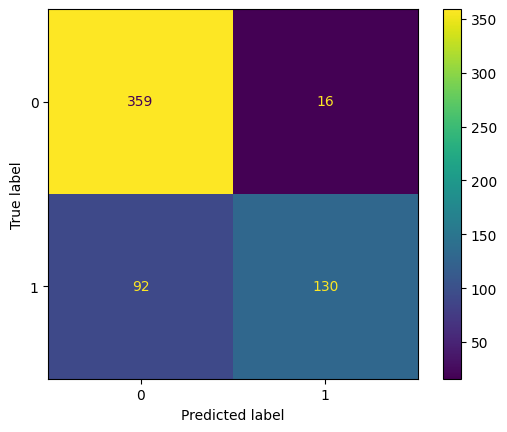

In [13]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Considerando que o objetivo seria prever o faturamento, podemos dizer que temos um modelo bastante apurado:  
Das 597 amostras avalidas, apenas 16 foram preditas como "compradoras"e não adquiriram o produto. 

#### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'euclidean',
                           n_neighbors=7,
                           p=2,
                           algorithm='auto'
                           )
knn.fit(X_train, y_train)
# Predizer os valores
y_pred = knn.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8140703517587939

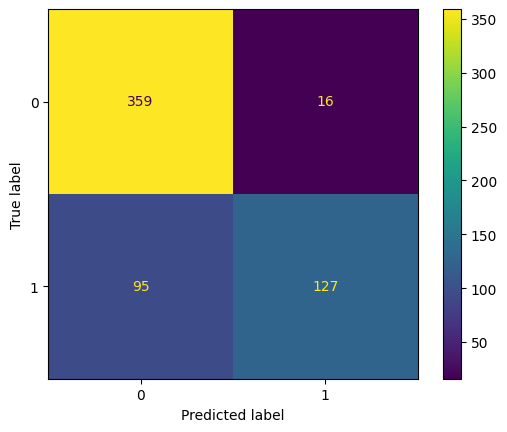

In [15]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Pode-se dizer que o algoritmo KNN teve um desempenho similar ao DecisionTree, utilizando a mesma base. 

#### Normalizando os dados 

In [16]:
insuranceDataNorm = insuranceData.copy()
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
# Colunas normalizadas: 'Age', 'AnnualIncome', 'FamilyMembers'

insuranceDataNorm[['Age', 'AnnualIncome', 'FamilyMembers']] = std.fit_transform(insuranceDataNorm[['Age', 'AnnualIncome', 'FamilyMembers']])

In [17]:
X_norm = insuranceDataNorm.drop(['TravelInsurance'], axis=1).values
y_norm = insuranceDataNorm['TravelInsurance'].values
X_trainNorm, X_testNorm, y_trainNorm, y_testNorm = train_test_split(X_norm,y_norm,train_size=0.7, test_size=0.3, random_state=42)

#### Decision Tree Normalizado

In [18]:
clfNorm = DecisionTreeClassifier(criterion="entropy", random_state=42, 
                             splitter = "random",
                             min_samples_split = 5,
                             min_samples_leaf = 2,
                            #  min_impurity_decrease = 0.01,
                             max_leaf_nodes=128,
                             max_depth=18
                            )
clfNorm.fit(X_trainNorm, y_trainNorm)

# Predizer os valores
y_predNorm = clfNorm.predict(X_testNorm)

# Medindo a acurácia do modelo
accuracy_score(y_testNorm, y_predNorm)

0.8040201005025126

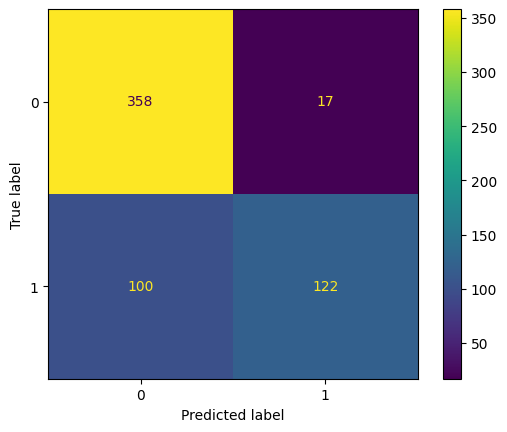

In [19]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_testNorm, y_predNorm)
ConfusionMatrixDisplay(cm).plot()


Para o algoritmo Decision Tree neste cenário, normalizar os dados com os parâmetros utilizados mostra-se irrelevante

#### KNN Normalizado

In [20]:
knnNorm = KNeighborsClassifier(metric = 'euclidean',
                           n_neighbors=11,
                           p=2,
                           algorithm='auto'
                           )
knnNorm.fit(X_trainNorm, y_trainNorm)
# Predizer os valores
y_predNorm = knnNorm.predict(X_testNorm)

# Medindo a acurácia do modelo
accuracy_score(y_testNorm, y_predNorm)

0.7989949748743719

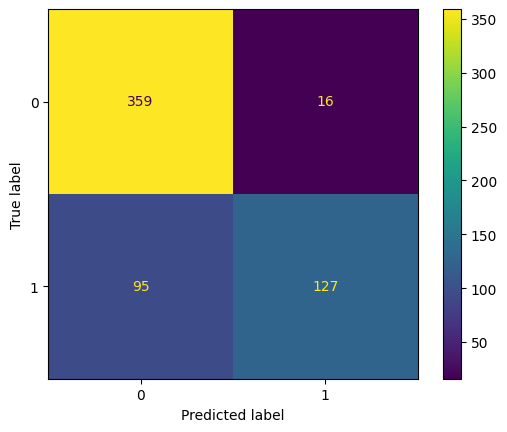

In [21]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Neste caso, o resultado fica ligeiramente pior, mas sem ser relevante para a análise.

#### Clusterizando com k-means

In [22]:
insuranceData.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(insuranceDataNorm[['AnnualIncome', 'FrequentFlyer']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Li

In [24]:
wcss

[2316.4866633115216,
 805.0826317880972,
 542.5459509576629,
 344.77979043144194,
 222.85837882111588,
 168.28085277502348,
 128.4316238521697,
 94.26316622258717,
 74.30077780220441,
 62.66765367132733,
 52.05442653843337,
 41.60084752945231,
 32.56034386972638,
 28.298335959138047]

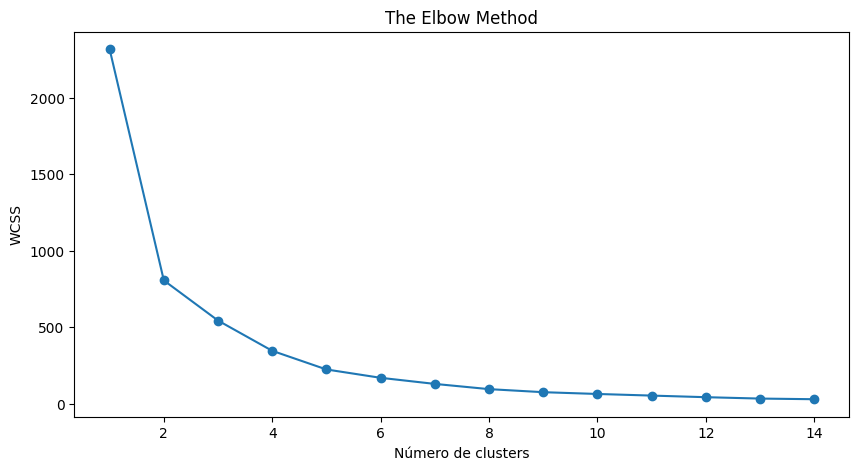

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(insuranceDataNorm[['AnnualIncome', 'FrequentFlyer']])
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
# Classificação dos dados
classificacao = kmeans1.labels_


c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
import plotly.express as px
import plotly.graph_objects as go
graf1 = px.scatter(x = insuranceDataNorm['AnnualIncome'], y = insuranceDataNorm['FrequentFlyer'], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'AnnualIncome')
graf3.update_yaxes(title = 'FrequentFlyer')
graf3.show()

## Trabalhando no dataset "Stress Level"

### EDA

In [28]:
stressData = pd.read_csv('../student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')
stressData.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [29]:
stressData.shape

(1100, 21)

In [30]:
for c in stressData.columns:
    print(f"{c:-^50s}")
    print(f'  Valores únicos: {len(list(stressData[c].unique()))}')
    print(f'Total de valores: {len(list(stressData[c]))}')
    if len(list(stressData[c].unique())) < 15:
        print(f'Lista de valores: {sorted(list(stressData[c].unique()))}')
    print(f'   Valores Nulos: {stressData[c].isna().sum()}')
    print(f'    Tipo de dado: {stressData[c].dtype}')
    print()

------------------anxiety_level-------------------
  Valores únicos: 22
Total de valores: 1100
   Valores Nulos: 0
    Tipo de dado: int64

-------------------self_esteem--------------------
  Valores únicos: 31
Total de valores: 1100
   Valores Nulos: 0
    Tipo de dado: int64

--------------mental_health_history---------------
  Valores únicos: 2
Total de valores: 1100
Lista de valores: [0, 1]
   Valores Nulos: 0
    Tipo de dado: int64

--------------------depression--------------------
  Valores únicos: 28
Total de valores: 1100
   Valores Nulos: 0
    Tipo de dado: int64

---------------------headache---------------------
  Valores únicos: 6
Total de valores: 1100
Lista de valores: [0, 1, 2, 3, 4, 5]
   Valores Nulos: 0
    Tipo de dado: int64

------------------blood_pressure------------------
  Valores únicos: 3
Total de valores: 1100
Lista de valores: [1, 2, 3]
   Valores Nulos: 0
    Tipo de dado: int64

------------------sleep_quality-------------------
  Valores únicos: 6
To

In [31]:
stressData.describe().T

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


In [32]:
stressData.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transformando as colunas em categorias:
for c in list(stressData.columns):
    stressData[c] = le.fit_transform(stressData[c])

In [34]:
stressData.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,0,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,2,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,0,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,2,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,2,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [35]:
stressData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

### Separação - Treino / Teste

In [36]:
# Separação entre treino e teste
X = stressData.drop(['stress_level'], axis=1).values
y = stressData['stress_level'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=42)

### Algoritmos

#### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42, 
                             splitter = "random",
                             min_samples_split = 3,
                             min_samples_leaf = 3,
                            #  min_impurity_decrease = 0.015,
                             max_leaf_nodes=500,
                             max_depth=15
                            )
clf.fit(X_train, y_train)

# Predizer os valores
y_pred = clf.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.906060606060606

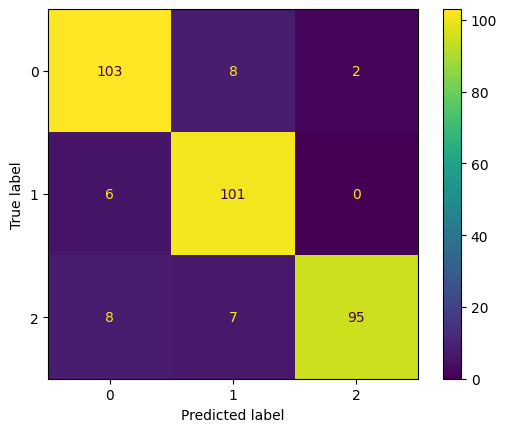

In [39]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


#### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'euclidean',
                           n_neighbors=9,
                           algorithm='auto'
                           )
knn.fit(X_train, y_train)
# Predizer os valores
y_pred = knn.predict(X_test)

# Medindo a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9090909090909091

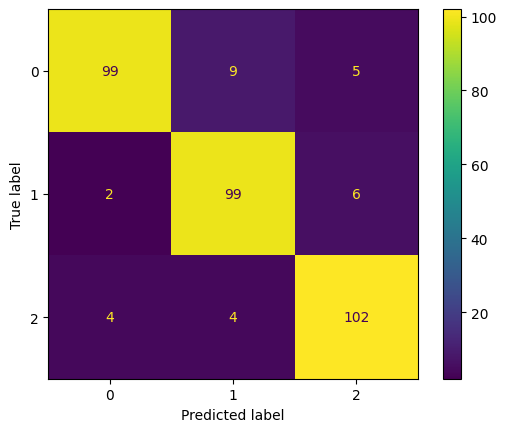

In [41]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Pode-se dizer novamente que o algoritmo KNN teve um desempenho similar ao DecisionTree, utilizando a mesma base.  

Para esta base, como tratam-se apenas de dados categóricos, não faz aplicar os algoritmos de normalização.  

#### Clusterizando com k-means

In [42]:
stressData.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,0,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,2,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,0,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,2,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,2,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [43]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(stressData[['anxiety_level', 'sleep_quality']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [44]:
wcss

[43764.38545454544,
 12838.440697998696,
 5949.312747215609,
 4008.500087863009,
 2812.0967769962854,
 2233.1481848120497,
 1936.3231375094554,
 1690.236555428065,
 1479.0067597443547,
 1336.0010037642353,
 1188.9270447166218,
 1010.523000019761,
 874.97650395687,
 878.1615482972119]

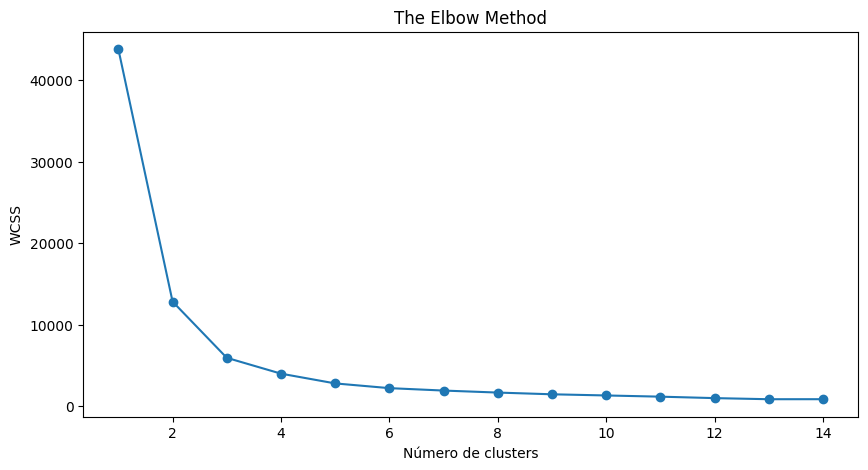

In [45]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(stressData[['anxiety_level', 'sleep_quality']])
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
# Classificação dos dados
classificacao = kmeans1.labels_


c:\Users\mcemi\Documents\Mestrado\M_DISC_2023-02_IA\.venv_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [50]:

graf1 = px.scatter(x = stressData['anxiety_level'], y = stressData['sleep_quality'], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'anxiety_level')
graf3.update_yaxes(title = 'sleep_quality')
graf3.show()